# Урок 2.  
# Масштабирование признаков.  
# L1- и L2-регуляризация.  
# Стохастический градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

# Виды масштабирования признаков

![img/normalization.png](img/normalization.png)

### MinMaxScaler  

$$\large X_{norm} = \frac{X – X_{min}}{X_{max}-X_{min}}$$

In [4]:
X[1].min(), X[1].max()

(0, 10)

In [5]:
X[2].min(), X[2].max()

(450, 2000)

In [6]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 3.00e+00, 0.00e+00,
        5.00e+00, 1.00e+01, 1.00e+00, 2.00e+00],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [7]:
X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())
X_norm

array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e-01, 1.00e-01, 2.00e-01, 1.00e-01, 3.00e-01, 0.00e+00,
        5.00e-01, 1.00e+00, 1.00e-01, 2.00e-01],
       [5.00e+02, 7.00e+02, 7.50e+02, 6.00e+02, 1.45e+03, 8.00e+02,
        1.50e+03, 2.00e+03, 4.50e+02, 1.00e+03],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        3.00e+00, 3.00e+00, 1.00e+00, 2.00e+00]])

In [8]:
X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.1       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [1.        , 1.        , 2.        , 1.        , 2.        ,
        1.        , 3.        , 3.        , 1.        , 2.        ]])

### Стандартизация  

$$\large X_{norm} = \frac{X – X_{mean}}{std}$$

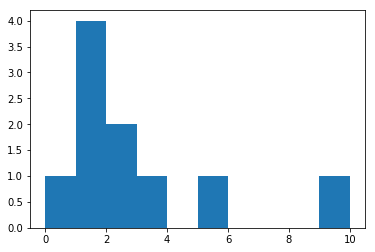

In [9]:
plt.hist(X[1]);

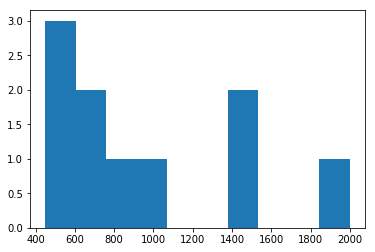

In [10]:
plt.hist(X[2]);

In [11]:
X1_mean = X[1].mean()
X1_mean

2.6

In [12]:
X1_std = X[1].std()
X1_std

2.8000000000000003

In [13]:
X_st = X.copy().astype(np.float64)

In [14]:
X_st[1] = (X[1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-5.71428571e-01, -5.71428571e-01, -2.14285714e-01,
        -5.71428571e-01,  1.42857143e-01, -9.28571429e-01,
         8.57142857e-01,  2.64285714e+00, -5.71428571e-01,
        -2.14285714e-01],
       [ 5.00000000e+02,  7.00000000e+02,  7.50000000e+02,
         6.00000000e+02,  1.45000000e+03,  8.00000000e+02,
         1.50000000e+03,  2.00000000e+03,  4.50000000e+02,
         1.00000000e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         3.00000000e+00,  3.00000000e+00,  1.00000000e+00,
         2.00000000e+00]])

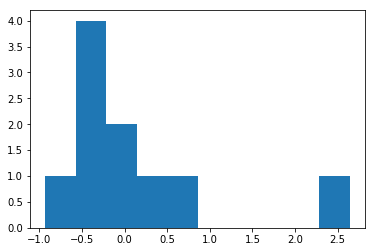

In [15]:
plt.hist(X_st[1]);

In [16]:
def custom_StandardScaler(x):
    res = (x - x.mean()) / x.std()
    return res

In [17]:
X_st[2] = custom_StandardScaler(X[2])

In [18]:
X_st[3] = custom_StandardScaler(X[3])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

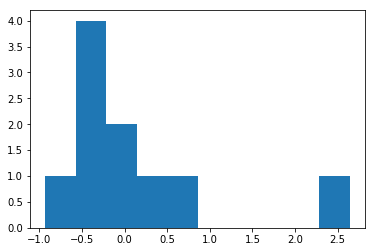

In [19]:
plt.hist(X_st[1]);

# SGD

![img/lr_gradient_descent.gif](img/lr_gradient_descent.gif)

Как нейронные сети обучаются с помощью градиентного спуска:  
https://www.youtube.com/watch?v=IHZwWFHWa-w

In [20]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [21]:
def eval_model(X, y, iterations, alpha=1e-3):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T).T))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [22]:
eval_model(X_st, y, iterations=1000)

# итерация: 100, MSE: 2244.6574832968568, веса: [11.06089051  0.97996423  2.3152749   1.21940533]
# итерация: 200, MSE: 1501.5902950584405, веса: [19.46834321  2.04402625  3.27727188  2.2244036 ]
# итерация: 300, MSE: 1014.4634988230167, веса: [26.3504049   2.67753905  3.80587337  2.80207597]
# итерация: 400, MSE: 691.5974337882292, веса: [31.98383216  3.06347797  4.08615875  3.13458077]
# итерация: 500, MSE: 476.4129168421405, веса: [36.5951687   3.3068623   4.22433712  3.32645389]
# итерация: 600, MSE: 332.5966322185971, веса: [40.36985572  3.46797253  4.28135448  3.4376843 ]
# итерация: 700, MSE: 236.34296341215654, веса: [43.45968921  3.58141359  4.29218071  3.50269584]
# итерация: 800, MSE: 171.874202186515, веса: [45.98892434  3.66705506  4.27687821  3.54124078]
# итерация: 900, MSE: 128.67552588442132, веса: [48.05927226  3.7363098   4.24695421  3.56465163]
# итерация: 1000, MSE: 99.7202374131186, веса: [49.75399034  3.79573713  4.20900626  3.5794289 ]


array([49.75399034,  3.79573713,  4.20900626,  3.5794289 ])

In [23]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [24]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=5, alpha=1e-2)

# итерация: 500, MSE: 40.295641704914814, веса: [57.39608832  5.5429385   2.20135489  3.93865902]
# итерация: 1000, MSE: 39.145954228546984, веса: [57.39806348  5.9180087   1.74015401  4.0288674 ]
# итерация: 1500, MSE: 38.643654370478444, веса: [57.39789695  6.0564191   1.55096128  4.08145981]
# итерация: 2000, MSE: 38.43030871545447, веса: [57.39783214  6.1092277   1.47369661  4.10668559]
# итерация: 2500, MSE: 38.34121221970602, веса: [57.39780652  6.1298393   1.44222587  4.11786561]
# итерация: 3000, MSE: 38.30441544320801, веса: [57.39779629  6.13800393  1.42942766  4.12263146]
# итерация: 3500, MSE: 38.289323677216686, веса: [57.39779218  6.14126837  1.4242279   4.12462097]
# итерация: 4000, MSE: 38.283160332109034, веса: [57.39779052  6.14258111  1.42211648  4.12544174]
# итерация: 4500, MSE: 38.280649809213116, веса: [57.39778985  6.14311088  1.4212594   4.12577805]
# итерация: 5000, MSE: 38.27962880377957, веса: [57.39778958  6.14332512  1.42091157  4.1259153 ]


array([57.39778958,  6.14332512,  1.42091157,  4.1259153 ])

### Регуляризация  

По сути, регуляризация - это ограничение модели.  
Для нас это, прежде всего, способ уменьшить сложность модели, чтобы предотвратить переобучение.
Проблема: признаки могут иметь линейную (или почти линейную) зависимость.  
Если у нас есть такие признаки, модель будет не устойчива к изменению в данных (большой variance).  
Чтобы побороть этот эффект, модель при обучении дополнительно ограничивают, используя **регуляризацию**.

Подробнее здесь:  
https://habr.com/ru/company/ods/blog/323890/  
и здесь:  
https://habr.com/ru/company/ods/blog/322076/  

L1 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right)  + \lambda \sum_{j=1}^m \left| w_j \right|$$

L2 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda \frac{1}{2} \sum_{j=1}^m w_j^2$$

In [25]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [26]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451])

### Домашнее задание:  
1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).
2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  
3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.

In [27]:
lambda_lst = np.linspace(1e-3, 10, 100)
lambda_lst

array([1.000e-03, 1.020e-01, 2.030e-01, 3.040e-01, 4.050e-01, 5.060e-01,
       6.070e-01, 7.080e-01, 8.090e-01, 9.100e-01, 1.011e+00, 1.112e+00,
       1.213e+00, 1.314e+00, 1.415e+00, 1.516e+00, 1.617e+00, 1.718e+00,
       1.819e+00, 1.920e+00, 2.021e+00, 2.122e+00, 2.223e+00, 2.324e+00,
       2.425e+00, 2.526e+00, 2.627e+00, 2.728e+00, 2.829e+00, 2.930e+00,
       3.031e+00, 3.132e+00, 3.233e+00, 3.334e+00, 3.435e+00, 3.536e+00,
       3.637e+00, 3.738e+00, 3.839e+00, 3.940e+00, 4.041e+00, 4.142e+00,
       4.243e+00, 4.344e+00, 4.445e+00, 4.546e+00, 4.647e+00, 4.748e+00,
       4.849e+00, 4.950e+00, 5.051e+00, 5.152e+00, 5.253e+00, 5.354e+00,
       5.455e+00, 5.556e+00, 5.657e+00, 5.758e+00, 5.859e+00, 5.960e+00,
       6.061e+00, 6.162e+00, 6.263e+00, 6.364e+00, 6.465e+00, 6.566e+00,
       6.667e+00, 6.768e+00, 6.869e+00, 6.970e+00, 7.071e+00, 7.172e+00,
       7.273e+00, 7.374e+00, 7.475e+00, 7.576e+00, 7.677e+00, 7.778e+00,
       7.879e+00, 7.980e+00, 8.081e+00, 8.182e+00, 

In [28]:
weights = np.empty((0,4), float)

In [29]:
for lmbd in lambda_lst:
    weights = np.vstack((weights,
                         eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=lmbd)))
    
weights

array([[57.37131434,  6.11038803,  1.44200443,  4.11257825],
       [54.61465271,  5.30074029,  2.2666524 ,  3.87800249],
       [52.11075806,  4.864785  ,  2.61909204,  3.75531387],
       [49.82638889,  4.57787797,  2.79743235,  3.66683528],
       [47.73388773,  4.36656783,  2.89334688,  3.59282878],
       [45.81005587,  4.19943191,  2.94428128,  3.5264711 ],
       [44.0352896 ,  4.06068968,  2.96834182,  3.46490196],
       [42.3929099 ,  3.94150922,  2.97532743,  3.40674369],
       [40.86863653,  3.83654128,  2.9709866 ,  3.35125511],
       [39.45017182,  3.74234344,  2.95890176,  3.29799798],
       [38.12686815,  3.65659076,  2.94141233,  3.24669055],
       [36.88946015,  3.57764958,  2.92010361,  3.19713761],
       [35.72984749,  3.50433323,  2.89608232,  3.14919479],
       [34.64091732,  3.43575499,  2.87014002,  3.10274922],
       [33.61639824,  3.37123585,  2.84285414,  3.05770853],
       [32.65073948,  3.31024456,  2.81465283,  3.01399441],
       [31.73901023,  3.

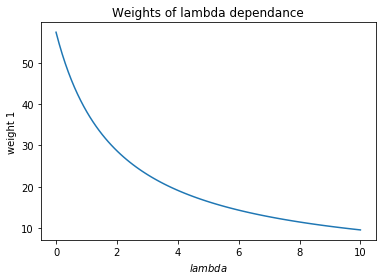

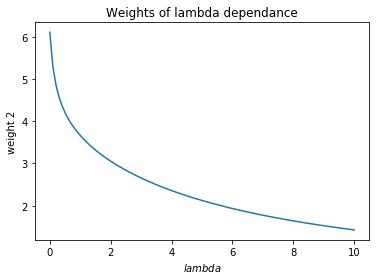

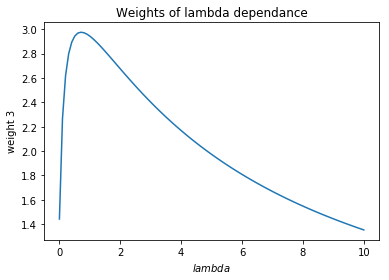

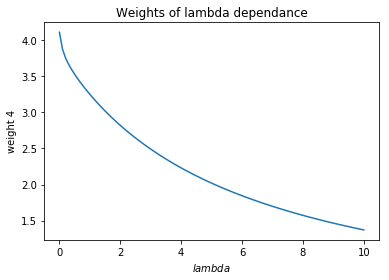

In [30]:
for i in range(weights.shape[1]):
    plt.title('Weights of lambda dependance')
    plt.xlabel(r'$lambda$')
    wght = 'weight ' + str(i+1)
    plt.ylabel(wght)

    plt.plot(lambda_lst, weights.T[i])
    plt.show()

2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

    Ответ: Это не имеет смысла, так как нормализацию правильно применять к одним типам данных (к неким измерениям, например, расстояния), а стандартизацию - к другим (например, к данным, распределенным нормально). 

    Также, у нормализации и стандартизации разный диапазон данных ([0,1] при нормализации, и 0 в центре для стандартизации)

3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [31]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W)) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [32]:
eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

500 [57.3976156   5.1079242   2.46011903  4.08691798] 39.98154926927971
1000 [57.3999499   5.76651203  1.85620907  4.03912572] 39.807123006041756
1500 [57.39995     5.99151699  1.60431305  4.06910179] 39.782340871131034
2000 [57.39995     6.07256443  1.50039558  4.09329499] 39.778489156156425
2500 [57.39995     6.10296578  1.45779797  4.10604572] 39.77786776237367
3000 [57.39995     6.11470092  1.44040178  4.11193613] 39.7777660764615
3500 [57.39995    6.1193181  1.4333132  4.1145017] 39.777749346503995
4000 [57.39995     6.12115708  1.43042856  4.11558584] 39.77774658745513
4500 [57.39995     6.12189515  1.42925561  4.11603642] 39.7777461315781
5000 [57.39995     6.12219276  1.42877888  4.11622191] 39.777746056009406


array([57.39995   ,  6.12219276,  1.42877888,  4.11622191])